# TP1a - Génération de variables aléatoires (Première partie)

## Estimation avancée - G3 SDIA

Dans ce TP, on s'intéresse à la génération de variables aléatoires, i.e., la capacité de produire des échantillons finis de variables ou vecteurs aléatoires d'une loi donnée. On suppose que l'on dispose d'un générateur de loi uniforme sur $[0,1]$ (avec Numpy, il est donné par $\texttt{np.random.rand}$). À partir de ce générateur, le but de ce TP sera de générer des échantillons d'autres lois, avec des méthodes simples, notamment la méthode de la *transformée inverse*. Des méthodes plus sophistiquées (acceptation-rejet, échantillonnage d'importance) seront présentées et étudiées à la séance suivante (après les vacances). Ce sera le sujet du TP-1b.

Pour chaque question, justifier la solution puis l'implémenter. Comparer avec la densité théorique à l'aide d'histogrammes ou de *kernel density estimates*.

### Instructions

1. Renommer votre notebook sous la forme `tp1a_Nom1_Nom2.ipynb`, et inclure le nom du binôme dans le notebook. 

2. Votre code, ainsi que toute sortie du code, doivent être commentés !

3. Déposer votre notebook sur Moodle dans la section prévue à cet effet avant la date limite : 8 Novembre 2023, 23h59.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns
import pandas as pd

### Partie 1 - Pour s'échauffer : lois uniformes

**Q1**. À partir de $N$ échantillons d'une loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillons d'une loi uniforme sur l'intervalle $[a,b]$ ?

---- Votre réponse ici ----

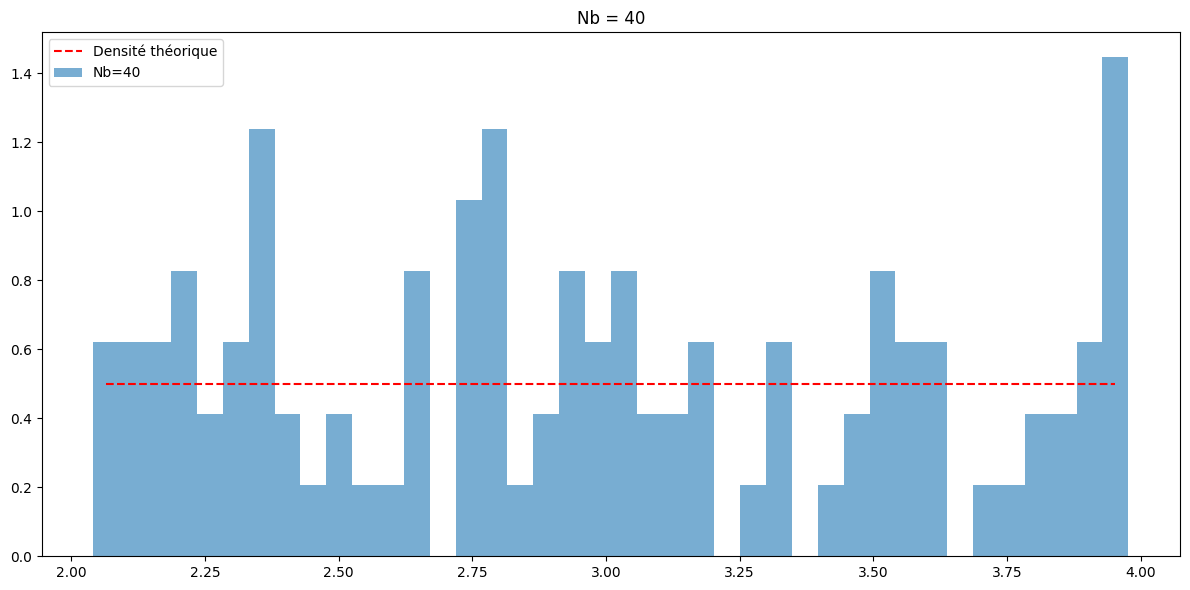

In [9]:
#####
N = 100
L = np.random.rand(N)
a,b = 2,4
L_ab = list(map(lambda x: x*(b-a)+ a, L))
Nb = 40

plt.figure(figsize=(12, 6))
hist, bins = np.histogram(L_ab, bins=Nb, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Theoritical density
density = np.full(Nb, 1 / (b - a))

plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), alpha=0.6, label=f'Nb={Nb}')
plt.plot(bin_centers, density, 'r--', label='Densité théorique')
plt.title(f'Nb = {Nb}')
plt.legend()

plt.tight_layout()
plt.show()
#####

**Q2**. Comment obtenir $N$ échantillons d'une loi uniforme sur le pavé $[a,b] \times [c,d]$ ?

---- Votre réponse ici ----

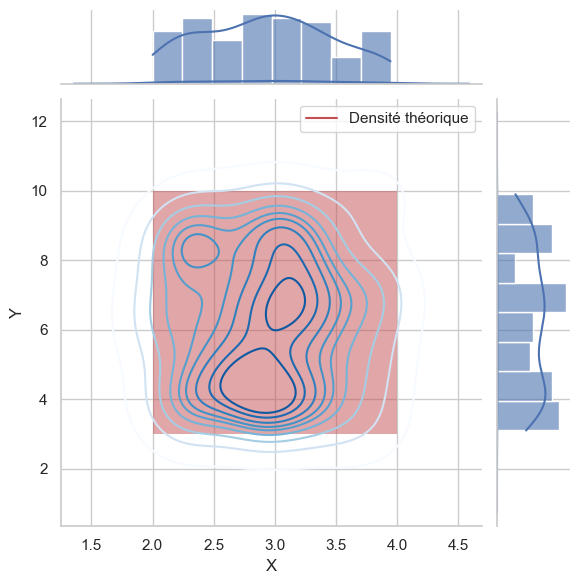

In [33]:
N = 100

a,b = 2,4
c,d = 3,10

Nb = 40

x_values = list(map(lambda x: x*(b-a)+ a, np.random.rand(N)))
y_values = list(map(lambda x: x*(d-c)+ c, np.random.rand(N)))

# Création d'un DataFrame pour seaborn
df = pd.DataFrame({'X': x_values, 'Y': y_values})

# Crée un graphique en nuage de points 2D avec densité estimée
sns.set(style="whitegrid")
g = sns.jointplot(x="X", y="Y", data=df, kind="kde", cmap="Blues")

# Dessine la zone de densité théorique
x_theoretical = np.linspace(a, b, 100)
y_theoretical = np.linspace(c, d, 100)
X, Y = np.meshgrid(x_theoretical, y_theoretical)
Z = np.ones_like(X) / ((b - a) * (d - c))

plt.contourf(X, Y, Z, colors='r', alpha=0.5)
g.plot_marginals(sns.histplot, color='b', alpha=0.6, kde=True)

plt.legend(handles=[plt.Line2D([0], [0], color='r', linestyle='-', label='Densité théorique')], loc="upper right")


plt.show()

**Q3**. À partir de $N$ échantillons de loi uniforme sur l'intervalle $[0,1]$, comment obtenir $N$ échantillon de loi uniforme discrète sur $\{1, ..., K\}$ ?

---- Votre réponse ici ----

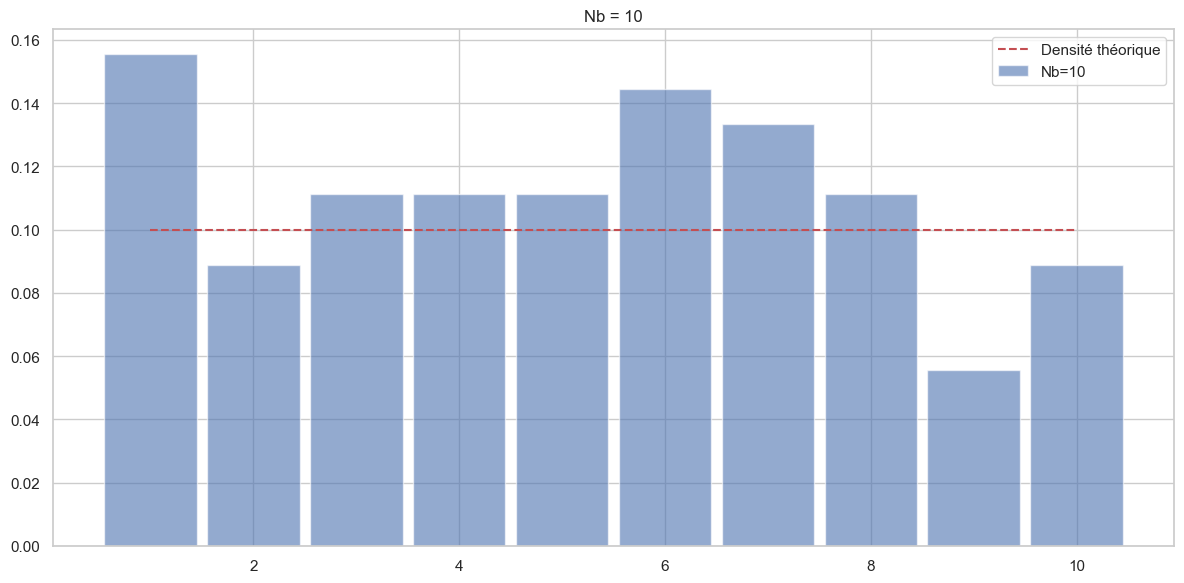

In [54]:
N = 100
L = np.random.rand(N)
k = 10
L_1_K = list(map(lambda x: np.floor(x*k)+ 1, L))


plt.figure(figsize=(12, 6))
hist, bins = np.histogram(L_1_K, bins=k, density=True)
bin_centers = np.linspace(1,10,10)

# Theoritical density
density = np.full(k, 1 /k)

plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), alpha=0.6, label=f'Nb={k}')
plt.plot(bin_centers, density, 'r--', label='Densité théorique')
plt.title(f'Nb = {k}')
plt.legend()

plt.tight_layout()
plt.show()

### Partie 2 - Méthode de la transformée inverse

Soit $X$ une variable aléatoire réelle de fonction de répartition $F$ (rappel : $F$ est une fonction croissante de $\mathbb{R}$ dans $[0,1]$, et "càdlàg", mais pas nécessairement bijective). On définit la **fonction inverse généralisée** $F^{-1}$ de $F$ par :
$$\forall~u \in [0,1], F^{-1}(u) = \inf\{x \in \mathbb{R}, F(x) \geq u\}.$$

Cette fonction conïncide avec l'inverse classique quand $F$ est bijective (attention même si $F$ est continue elle n'est pas nécessairement bijective, il peut y avoir des plateaux).

**Q1**. Montrer la proposition suivante :

Si $U$ suit la loi uniforme sur l'intervalle $[0,1]$, alors la v.a. $F^{-1}(U)$ a pour fonction de répartition $F$ (et donc la même loi que $X$).

Cela donne donc la méthode de la **transformée inverse** ; Si l'on connait explicitement la fonction $F^{-1}$, on peut simuler de n'importe quelle variable aléatoire à partir d'un échantillon de loi uniforme.

---- Votre réponse ici ----

**Q2**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi exponentielle de paramètre $\lambda$.

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q3**. À l'aide de cette méthode, simuler $N$ échantillons d'une loi de Cauchy (standard, i.e. $x_0 = 0, a = 1$).

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q4**. Quelles sont les limitations de la méthode de la transformée inverse ?

---- Votre réponse ici ----

### Partie 3 - Transformation particulière : Méthode de Box-Müller

**Q1**. Soit $R \sim \text{Exp}(1/2)$ et $\Theta \sim U([0, 2 \pi])$ deux variables aléatoires indépendantes.

Montrer que $X = \sqrt{R} cos(\Theta)$ et $Y = \sqrt{R} sin(\Theta)$ sont deux variables indépendantes de loi $\mathcal{N}(0,1)$.

Cette méthode est connue comme la méthode de Box-Müller (1958), et est l'une des méthodes de référence pour générer des variables aléatoires normales.

----- Votre réponse ici -----

**Q2**. En déduire une façon de générer un $N$ échantillons de loi normale $\mathcal{N}(0,1)$ à partir d'échantillons d'une loi uniforme sur l'intervalle $[0,1]$.

In [ ]:
#####
### YOUR CODE HERE
#####

**Q3**. À partir de $N$ échantillons de loi $\mathcal{N}(0,1)$, comment obtenir un $N$ échantillons de loi $\mathcal{N}(\mu, \sigma^2)$ ?

---- Votre réponse ici ----

In [ ]:
#####
### YOUR CODE HERE
#####

**Q4**. On s'intéresse maintenant à la simulation d'un **vecteur** gaussien en dimension $d$.

Expliquer pourquoi la méthode de Box-Müller permet de simuler des vecteurs de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$.

Soit $X \sim \mathcal{N_d}(\mathbf{0}_d, I_d)$, $\mathbf{m} \in \mathbb{R}^d$, et $\boldsymbol{\Sigma} \in \mathbb{R}^{d \times d}$ symétrique définie positive. On suppose qu'il existe $\mathbf{L} \in \mathbb{R}^{d \times d}$ tel que $\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top}$. À l'aide des propriétés des vecteurs gaussiens, montrer que $Y = m + \mathbf{L}X \sim \mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$.

---- Votre réponse ici ----

**Q5**. On peut montrer qu'une telle matrice $\mathbf{L}$ existe toujours. C'est la **décomposition de Cholesky** ($\mathbf{L}$ est triangulaire inférieure), qui est fondamentale en statistique et *machine learning*. Elle tire son nom d'André-Louis Cholesky, ingénieur polytechnicien, mort pendant la première guerre mondiale (résultat publié de manière posthume en 1924). À noter que le coût de calcul de cette décomposition est $\mathcal{O}(d^3)$ !

À partir de $N$ échantillons de loi $\mathcal{N_d}(\mathbf{0}_d, I_d)$, générer $N$ échantillons de loi $\mathcal{N_d}(\mathbf{m}, \boldsymbol{\Sigma})$. Prendre $d=2$ et utiliser $\texttt{np.linalg.cholesky}$.

In [ ]:
#####
### YOUR CODE HERE
#####